# 선형회귀 개요

선형 회귀(線型回歸, Linear regression)는 종속 변수 y와 한 개 이상의 독립 변수X와의 선형 상관 관계를 모델링하는 회귀분석 기법. [위키백과](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%ED%9A%8C%EA%B7%80)

## 선형회귀 모델
- 각 Feature들에 가중치(Weight)를 곱하고 편향(bias)를 더해 예측 결과를 출력한다.
- Weight와 bias가 학습 대상 Parameter가 된다.

\begin{align}
&\hat{y_i} = w_1 x_{i1} + w_2 x_{i2}... + w_{p} x_{ip} + b \\
&\hat{y_i} = \mathbf{w}^{T} \cdot \mathbf{X} 
\end{align}

- $\hat{y_i}$: 예측값
- $x$: 특성(feature-컬럼)
- $w$: 가중치(weight), 회귀계수(regression coefficient). 특성이 $\hat{y_i}$ 에 얼마나 영향을 주는지 정도
- $b$: 절편
- $p$: p 번째 특성(feature)/p번째 가중치
- $i$: i번째 관측치(sample)

### Boston DataSet
보스톤의 지역별 집값 데이터셋

 - CRIM	: 지역별 범죄 발생률
 - ZN	: 25,000 평방피트를 초과하는 거주지역의 비율
 - INDUS: 비상업지역 토지의 비율
 - CHAS	: 찰스강에 대한 더미변수(강의 경계에 위치한 경우는 1, 아니면 0)
 - NOX	: 일산화질소 농도
 - RM	: 주택 1가구당 평균 방의 개수
 - AGE	: 1940년 이전에 건축된 소유주택의 비율
 - DIS	: 5개의 보스턴 고용센터까지의 접근성 지수
 - RAD	: 고속도로까지의 접근성 지수
 - TAX	: 10,000 달러 당 재산세율
 - PTRATIO : 지역별 교사 한명당 학생 비율
 - B	: 지역의 흑인 거주 비율
 - LSTAT: 하위계층의 비율(%) 
 - MEDV	: Target.  지역의 주택가격 중앙값 (단위: $1,000)


#### Boston housing dataset loading

In [33]:
import pandas as pd

df = pd.read_csv("data/boston_hosing.csv")
df.shape

(506, 14)

In [34]:
X = df.drop(columns='MEDV')
y = df['MEDV']

In [35]:
# train/test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## LinearRegression
- 가장 기본적인 선형 회귀 모델
- 각 Feauture에 가중합으로 Y값을 추론한다.
- attribute(학습 후 조회가능)
    - **coef_**: 각 Feature에 곱하는 가중치
    - **intercept_**: y절편. 모든 Feature가 0일때 예측값
    
### 데이터 전처리

- **선형회귀 모델사용시 전처리**
    - **범주형 Feature**
        - : 원핫 인코딩
    - **연속형 Feature**
        - Feature Scaling을 통해서 각 컬럼들의 값의 단위를 맞춰준다.
        - StandardScaler를 사용할 때 성능이 더 잘나오는 경향이 있다.

##### Feature scaling

In [36]:
## trainset으로 fit 한 것으로 train/test/validation set 변환.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 모델 생성, 학습

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [38]:
#### 학습 후 찾은 weights 와 bias 조회
print("weights")
# print(lr.coef_)
pd.Series(lr.coef_, index=X.columns)

weights


CRIM      -0.970820
ZN         1.057149
INDUS      0.038311
CHAS       0.594506
NOX       -1.855148
RM         2.573219
AGE       -0.087615
DIS       -2.880943
RAD        2.112245
TAX       -1.875331
PTRATIO   -2.292767
B          0.718179
LSTAT     -3.592455
dtype: float64

In [39]:
print("bias-모든 feature들이 0일 때 y값")
lr.intercept_

bias-모든 feature들이 0일 때 y값


22.611881188118804

> ### Coeficient의 부호
> - weight가 
> - 양수: Feature가 1 증가할때 y(집값)도 weight만큼 증가한다.
> - 음수: Feature가 1 증가할때 y(집값)도 weight만큼 감소한다.
> - 절대값 기준으로 0에 가까울 수록 집값에 영향을 주지 않고 크면 클수록(0에서 멀어질 수록) 집값에 영향을 많이 주는 Feature 란 의미가 된다.

In [40]:
import numpy as np
X_test_scaled[0][np.newaxis, ...].shape

(1, 13)

In [41]:
X_test_scaled[0][np.newaxis, ...]

array([[-0.40835869, -0.49960763, -1.12872913, -0.27288841, -0.83336883,
         0.04497197, -1.84621525,  0.69506929, -0.62464765,  0.15913664,
        -0.71272928,  0.18547577, -0.73610347]])

In [42]:
lr.predict(X_test_scaled[0][np.newaxis, ...])

array([24.88963777])

In [43]:
lr.coef_[..., np.newaxis].shape

(13, 1)

In [44]:
X_test_scaled[0][np.newaxis, ...] @ lr.coef_[..., np.newaxis] + lr.intercept_  # 행렬(2차원) @ 2차원 => (1, 13) @ (13, 1)

array([[24.88963777]])

In [45]:
X_test_scaled[0] @ lr.coef_ + lr.intercept_  # 1차원 @ 1차원

24.8896377727566

In [46]:
y_test.iloc[0]

22.6

##### 평가

In [47]:
## 회귀 - mse, rmse, (ma-절대값-e), r2
from metrics import print_regression_metrcis

print_regression_metrcis(y_train, lr.predict(X_train_scaled), title="Transet")

Transet
MSE: 19.326470203585725
RMSE: 4.396188144698282
R Squared: 0.7730135569264234


In [48]:
print_regression_metrcis(y_test, lr.predict(X_test_scaled), title="Testset")

Testset
MSE: 33.448979997676496
RMSE: 5.783509315085133
R Squared: 0.5892223849182512


In [49]:
####### Pipeline 이용
from sklearn.pipeline import Pipeline

pl = Pipeline([
    ("scaler", StandardScaler()), ("model", LinearRegression())
], verbose=True)

pl.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())],
         verbose=True)

In [50]:
pred = pl.predict(X_test)
pred[:10]

array([24.88963777, 23.72141085, 29.36499868, 12.12238621, 21.44382254,
       19.2834443 , 20.49647539, 21.36099298, 18.8967118 , 19.9280658 ])

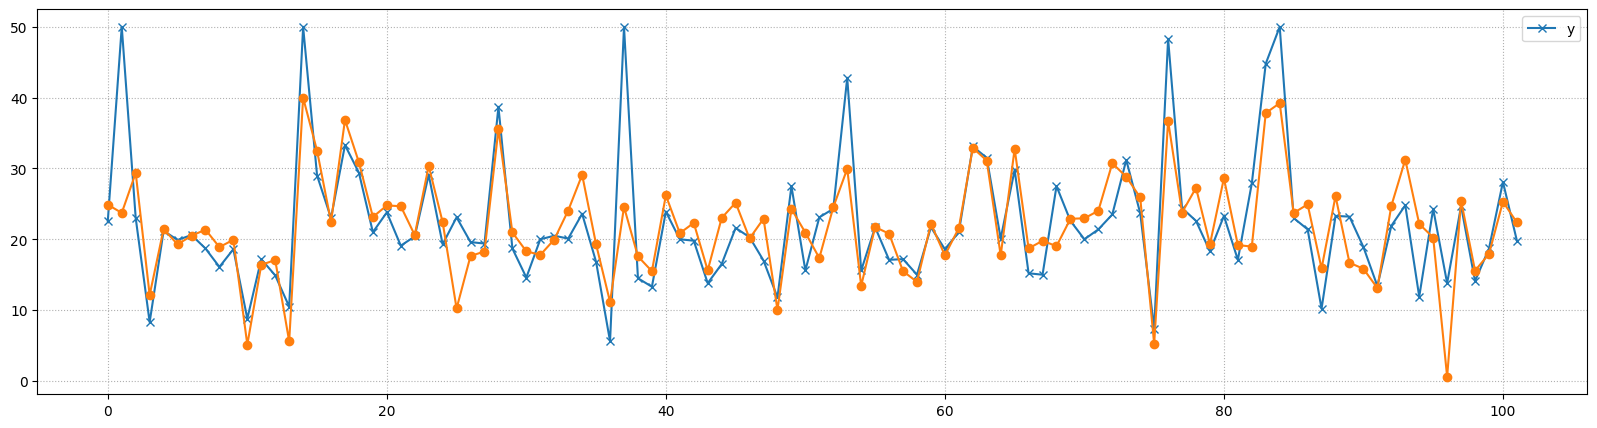

In [51]:
### y_test 정답과 추론값 비교 - 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))
plt.plot(range(y_test.size), y_test, marker="x", label="y")
plt.plot(range(y_test.size), pred, marker='o', label="")
plt.legend()
plt.grid(True, linestyle=":")
plt.show()

# 다항회귀 (Polynomial Regression)
- 전처리방식 중 하나로 Feature가 너무 적어 y의 값들을 다 설명하지 못하여 underfitting이 된 경우 Feature를 늘려준다.
- 각 Feature들을 거듭제곱한 것과 Feature들 끼리 곱한 새로운 특성들을 추가한다.
    - 파라미터(Coef, weight)를 기준으로는 일차식이 되어 선형모델이다. 그렇지만 input 기준으로는 N차식이 되어 비선형 데이터를 추론할 수 있는 모델이 된다.
- `PolynomialFeatures` Transformer를 사용해서 변환한다.

## 예제

##### 데이터셋 만들기

In [192]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# 모델링을 통해 찾아야 하는 함수.
def func(X):
    return X**2 + X + 2 + np.random.normal(0,1, size=(X.size, 1))
  # 0.94978823 * X2 + 0.97906552 * X1 + 2.3405007562628866
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = func(X)
y = y.flatten()

print(X.shape, y.shape)

(100, 1) (100,)


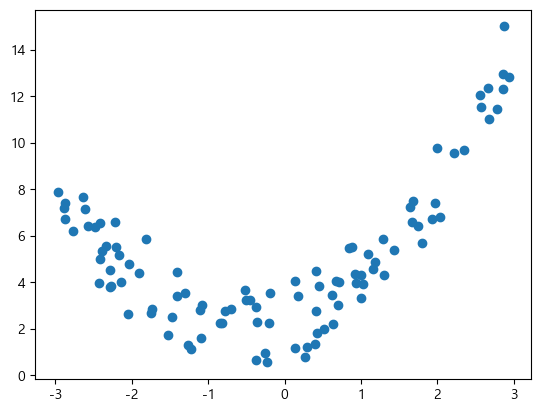

In [193]:
import matplotlib.pyplot as plt
plt.scatter(X,  y)
plt.show()

##### 모델생성, 학습

In [194]:
lr = LinearRegression()
lr.fit(X, y)
pred = lr.predict(X)

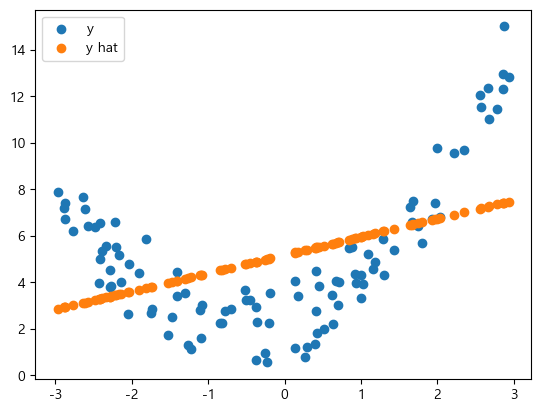

In [195]:
import matplotlib.pyplot as plt
plt.scatter(X,  y, label="y")
plt.scatter(X, pred, label='y hat')
plt.legend()
plt.show()

In [196]:
lr.coef_, lr.intercept_

(array([0.78189543]), 5.175619278567209)

In [197]:
print_regression_metrcis(y, pred)

MSE: 7.729204760808937
RMSE: 2.7801447373848966
R Squared: 0.19138252437306003


In [198]:
y.mean()

5.047985043575299

In [199]:
X2.shape

(100, 1)

In [200]:
# X2 = X**2
# np.concatenate([X, X2, X**3], axis=1)

##### PolynomialFeatures를 이용해 다항회귀구현

In [201]:
# w*x + b
# 10,2,4: weight, 100: bias
# [10, 2, 4, 100] @ [5, 6, 7, 1] 
# include_bias=True  내적으로 선형회귀 공식을 만들때 bias 항을 처리하기 위해서

In [202]:
from sklearn.preprocessing import PolynomialFeatures
pnf = PolynomialFeatures(
    degree=2,            # 최고차항의 차수. ex) 4로 지정. -> x(원래 컬럼), x^2, x^3, x^4  한 feature추가.
    include_bias=False, #True(기본값) - 상수항 feature 생성여부. (모든 값이 1인 feature)
)
# pnf.fit(X)
# pnf.transform(X)
X_poly = pnf.fit_transform(X)

In [203]:
print(X.shape, X_poly.shape)

(100, 1) (100, 2)


##### LinearRegression 모델을 이용해 평가

In [204]:
lr2 = LinearRegression()
lr2.fit(X_poly, y)

LinearRegression()

In [205]:
lr2.coef_, lr2.intercept_

(array([0.97906552, 0.94978823]), 2.3405007562628866)

##### 시각화

In [206]:
X_new = np.linspace(-3, 3, 1000)[..., np.newaxis]  # (1000, ) -> (1000, 1)
X_new_poly = pnf.transform(X_new)
# X_new_poly.shape
y_hat = lr2.predict(X_new_poly)

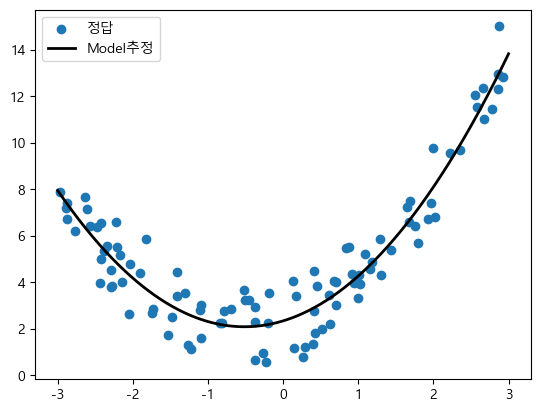

In [207]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = "malgun gothic"
plt.rcParams['axes.unicode_minus'] = False
plt.scatter(X, y, label="정답")
plt.plot(X_new, y_hat, color='k', linewidth=2, label="Model추정")
plt.legend()
plt.show()

In [208]:
# 평가
from metrics import print_regression_metrcis
print_regression_metrcis(y, lr2.predict(X_poly))

MSE: 0.9735576723414217
RMSE: 0.9866902616026073
R Squared: 0.8981478985551461


## degree를 크게
- Feature가 너무 많으면 Overfitting 문제가 생긴다.

In [209]:
pnf3 = PolynomialFeatures(degree=25, include_bias=False)
X_poly3 = pnf3.fit_transform(X)
lr3 = LinearRegression()
lr3.fit(X_poly3, y)

LinearRegression()

In [210]:
pred3 = lr3.predict(X_poly3)
print_regression_metrcis(y, pred3)

MSE: 0.7964961565754771
RMSE: 0.89246633358098
R Squared: 0.9166718011221099


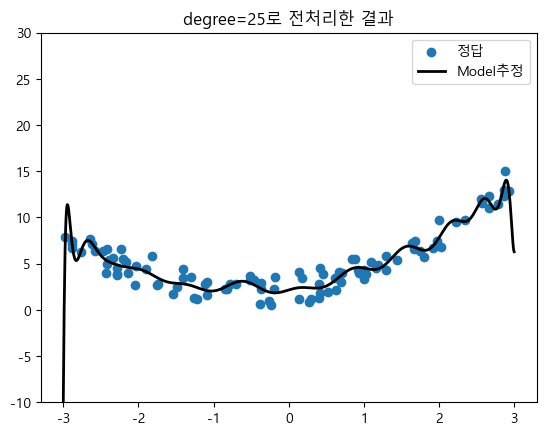

In [211]:
# degree=25 시각화
y_hat = lr3.predict(pnf3.transform(X_new))
plt.scatter(X, y, label="정답")
plt.plot(X_new, y_hat, color='k', linewidth=2, label="Model추정")
plt.legend()
plt.title("degree=25로 전처리한 결과")
plt.ylim(-10, 30)
plt.show()

### PolynomialFeatures 예제

In [212]:
data = np.arange(12).reshape(6, 2)
data

array([[ 0,  1],
       [ 2,  3],
       [ 4,  5],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [213]:
pnf = PolynomialFeatures(degree=2, include_bias=False)
poly2 = pnf.fit_transform(data)
poly2.shape

(6, 5)

In [214]:
# transformer(변환기).get_feature_names_out() : 처리된 array의 feature의 이름들 반환.
#          feature의 개수가 변경되는 변환기에 있는 공통메소드.
pnf.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [215]:
poly2

array([[  0.,   1.,   0.,   0.,   1.],
       [  2.,   3.,   4.,   6.,   9.],
       [  4.,   5.,  16.,  20.,  25.],
       [  6.,   7.,  36.,  42.,  49.],
       [  8.,   9.,  64.,  72.,  81.],
       [ 10.,  11., 100., 110., 121.]])

In [216]:
pnf2 = PolynomialFeatures(degree=20, include_bias=False)
poly_n = pnf2.fit_transform(data)
poly_n.shape

(6, 230)

In [217]:
pnf2.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2',
       'x1^3', 'x0^4', 'x0^3 x1', 'x0^2 x1^2', 'x0 x1^3', 'x1^4', 'x0^5',
       'x0^4 x1', 'x0^3 x1^2', 'x0^2 x1^3', 'x0 x1^4', 'x1^5', 'x0^6',
       'x0^5 x1', 'x0^4 x1^2', 'x0^3 x1^3', 'x0^2 x1^4', 'x0 x1^5',
       'x1^6', 'x0^7', 'x0^6 x1', 'x0^5 x1^2', 'x0^4 x1^3', 'x0^3 x1^4',
       'x0^2 x1^5', 'x0 x1^6', 'x1^7', 'x0^8', 'x0^7 x1', 'x0^6 x1^2',
       'x0^5 x1^3', 'x0^4 x1^4', 'x0^3 x1^5', 'x0^2 x1^6', 'x0 x1^7',
       'x1^8', 'x0^9', 'x0^8 x1', 'x0^7 x1^2', 'x0^6 x1^3', 'x0^5 x1^4',
       'x0^4 x1^5', 'x0^3 x1^6', 'x0^2 x1^7', 'x0 x1^8', 'x1^9', 'x0^10',
       'x0^9 x1', 'x0^8 x1^2', 'x0^7 x1^3', 'x0^6 x1^4', 'x0^5 x1^5',
       'x0^4 x1^6', 'x0^3 x1^7', 'x0^2 x1^8', 'x0 x1^9', 'x1^10', 'x0^11',
       'x0^10 x1', 'x0^9 x1^2', 'x0^8 x1^3', 'x0^7 x1^4', 'x0^6 x1^5',
       'x0^5 x1^6', 'x0^4 x1^7', 'x0^3 x1^8', 'x0^2 x1^9', 'x0 x1^10',
       'x1^11', 'x0^12', 'x0^11 x1', 'x0^10 x1^2', 'x0^9 x1^3',
 

### PolynomialFeatures를 Boston Dataset에 적용

In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from metrics import print_regression_metrcis

df = pd.read_csv('data/boston_hosing.csv')
X = df.drop(columns='MEDV')
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [179]:
# interaction_only=True : 교차항만 추가.
preprocessing = Pipeline(
    steps=[("poly", PolynomialFeatures(degree=2, include_bias=False)), 
              ("scaler", StandardScaler())]
)

In [180]:
X_train_scaled = preprocessing.fit_transform(X_train)
X_test_scaled = preprocessing.transform(X_test)

In [181]:
X.shape, X_train_scaled.shape

((506, 13), (404, 104))

In [182]:
preprocessing.steps[0][1].get_feature_names_out()

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

In [183]:
#### 모델링용 파이프라인
pipeline = Pipeline([("preprocess", preprocessing), ("model", LinearRegression())])

##### 모델 생성 학습 추론 평가

In [184]:
# 학습
pipeline.fit(X_train, y_train)
# 검증
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

In [185]:
print_regression_metrcis(y_train, pred_train, "train set")

train set
MSE: 4.340278052012291
RMSE: 2.0833333991496157
R Squared: 0.9490240966612828


In [186]:
print_regression_metrcis(y_test, pred_test, "test set")

test set
MSE: 31.27781497144707
RMSE: 5.592657237078549
R Squared: 0.6158858584078876


## 규제 (Regularization)
- 선형 회귀 모델에서 과대적합(Overfitting) 문제를 해결하기 위해 가중치(회귀계수)에 페널티 값을 적용한다.
- 입력데이터의 Feature들이 너무 많은 경우 Overfitting이 발생.
    - Feature수에 비해 관측치 수가 적은 경우 모델이 복잡해 지면서 Overfitting이 발생한다.
- 해결
    - 데이터를 더 수집한다. 
    - Feature selection
        - 불필요한 Features들을 제거한다.
    - 규제 (Regularization) 을 통해 Feature들에 곱해지는 가중치가 커지지 않도록 제한한다.(0에 가까운 값으로 만들어 준다.)
        - LinearRegression의 규제는 학습시 계산하는 오차를 키워서 모델이 오차를 줄이기 위해 가중치를 0에 가까운 값으로 만들도록 하는 방식을 사용한다.
        - L1 규제 (Lasso)
        - L2 규제 (Ridge)
    

## Ridge Regression (L2 규제)
- 손실함수(loss function)에 규제항으로 $\alpha \sum_{i=1}^{n}{w_{i}^{2}}$ (L2 Norm)을 더해준다.
- $\alpha$는 하이퍼파라미터로 모델을 얼마나 많이 규제할지 조절한다. 
    - $\alpha = 0$ 에 가까울수록 규제가 약해진다. (0일 경우 선형 회귀동일)
    - $\alpha$ 가 커질 수록 모든 가중치가 작아져 입력데이터의 Feature들 중 중요하지 않은 Feature의 예측에 대한 영향력이 작아지게 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \cfrac{1}{2}\sum_{i=1}^{n}{w_{i}^{2}}
$$

> **손실함수(Loss Function):** 모델의 예측한 값과 실제값 사이의 차이를 정의하는 함수로 모델이 학습할 때 사용된다.

In [221]:
# Ridge, Lasso, LinearRegression - 모델 함수는 동일(WX + b). 
#                                           최적의 parameter(w, b)를 찾는 방법(손실함수)의 차이.
from sklearn.linear_model import Ridge #, Lasso, LinearRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 규제 alpha 에 따른 weight 변화

In [226]:
from sklearn.metrics import r2_score

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

# alpha에 따른 각 feature 곱해지는 weight들을 저장할 DataFrame
coef_df = pd.DataFrame() 
bias_list = [] #bias 들 저장할 리스트

for alpha in alpha_list:
    model = Ridge(alpha=alpha, random_state=0)
    model.fit(X_train_scaled, y_train)
    coef_df[f"{alpha}"] = model.coef_
    bias_list.append(model.intercept_)
    # 검증결과 출력
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    print(f"Alpha {alpha} - Train: {r2_score(y_train, pred_train)}, Test: {r2_score(y_test, pred_test)}")

Alpha 0.001 - Train: 0.7730135569106857, Test: 0.5892212945055596
Alpha 0.01 - Train: 0.7730135553534744, Test: 0.5892114815046761
Alpha 0.1 - Train: 0.7730134004374536, Test: 0.589113422273519
Alpha 1 - Train: 0.7729986739069825, Test: 0.5881400471345539
Alpha 10 - Train: 0.772025270378812, Test: 0.5791628807875258
Alpha 100 - Train: 0.7515163225742547, Test: 0.5272685191319562
Alpha 500 - Train: 0.6588192082625857, Test: 0.42879808129182595
Alpha 1000 - Train: 0.5728326430134054, Test: 0.36551722844114254


In [229]:
coef_df.index = X_train.columns

In [230]:
coef_df

,0.001,0.01,0.1,1,10,100,500,1000
CRIM,-0.970811,-0.970732,-0.969942,-0.962257,-0.901965,-0.708783,-0.543189,-0.453716
ZN,1.057132,1.056981,1.055479,1.040872,0.926287,0.602925,0.475571,0.416153
INDUS,0.038283,0.038034,0.035549,0.011680,-0.157051,-0.481556,-0.547926,-0.504161
CHAS,0.594511,0.594550,0.594942,0.598719,0.625918,0.662516,0.506250,0.369364
NOX,-1.855112,-1.854790,-1.851578,-1.820134,-1.560302,-0.702047,-0.405744,-0.374977
RM,2.573230,2.573329,2.574308,2.583786,2.653906,2.643872,1.813405,1.294925
AGE,-0.087623,-0.087694,-0.088395,-0.095188,-0.146581,-0.263320,-0.317919,-0.322093
DIS,-2.880909,-2.880612,-2.877636,-2.848263,-2.588020,-1.393256,-0.358183,-0.078157
RAD,2.112167,2.111458,2.104394,2.036231,1.533846,0.322752,-0.210082,-0.290222
TAX,-1.875259,-1.874610,-1.868146,-1.806092,-1.370452,-0.612679,-0.519593,-0.478899


## Lasso(Least Absolut Shrinkage and Selection Operator) Regression (L1 규제)

- 손실함수에 규제항으로 $\alpha \sum_{i=1}^{n}{\left| w_i \right|}$ (L1 Norm)더한다.
- Lasso 회귀의 상대적으로 덜 중요한 특성의 가중치를 0으로 만들어 자동으로 Feature Selection이 된다.

$$
\text{손실함수}(w) = \text{MSE}(w) + \alpha \sum_{i=1}^{n}{\left| w_i \right|}
$$

In [231]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]

# alpha에 따른 각 feature 곱해지는 weight들을 저장할 DataFrame
coef_df2 = pd.DataFrame() 
bias_list2 = [] #bias 들 저장할 리스트

for alpha in alpha_list:
    model = Lasso(alpha=alpha, random_state=0)
    model.fit(X_train_scaled, y_train)
    coef_df2[f"{alpha}"] = model.coef_
    bias_list2.append(model.intercept_)
    # 검증결과 출력
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)
    print(f"Alpha {alpha} - Train: {r2_score(y_train, pred_train)}, Test: {r2_score(y_test, pred_test)}")

Alpha 0.001 - Train: 0.773012729511684, Test: 0.5890287763120774
Alpha 0.01 - Train: 0.7729557113377097, Test: 0.5874763161420908
Alpha 0.1 - Train: 0.7676692732920614, Test: 0.5663726208397636
Alpha 1 - Train: 0.7066864437965619, Test: 0.5069663003862215
Alpha 10 - Train: 0.0, Test: -0.001889737528507185
Alpha 100 - Train: 0.0, Test: -0.001889737528507185
Alpha 500 - Train: 0.0, Test: -0.001889737528507185
Alpha 1000 - Train: 0.0, Test: -0.001889737528507185


In [234]:
coef_df2

,0.001,0.01,0.1,1,10,100,500,1000
0,-0.967874,-0.940302,-0.663468,-0.000000,-0.0,-0.0,-0.0,-0.0
1,1.053234,1.021582,0.701524,0.000000,0.0,0.0,0.0,0.0
2,0.028566,-0.000000,-0.130724,-0.000000,-0.0,-0.0,-0.0,-0.0
3,0.594814,0.594840,0.588934,0.000000,0.0,0.0,0.0,0.0
4,-1.848201,-1.804075,-1.358749,-0.000000,-0.0,-0.0,-0.0,-0.0
5,2.574014,2.585398,2.722754,2.540098,0.0,0.0,0.0,0.0
6,-0.085817,-0.069486,-0.000000,-0.000000,-0.0,-0.0,-0.0,-0.0
7,-2.874999,-2.809365,-2.140932,-0.000000,0.0,0.0,0.0,0.0
8,2.093952,1.956109,0.640853,-0.000000,-0.0,-0.0,-0.0,-0.0
9,-1.857546,-1.738284,-0.658779,-0.171527,-0.0,-0.0,-0.0,-0.0


### PolynormialFeatures로 전처리한 Boston Dataset 에 Ridge, Lasso 규제 적용

In [238]:
X_train_poly = preprocessing.fit_transform(X_train)
X_test_poly = preprocessing.transform(X_test)
X_train_poly.shape

(404, 104)

##### LinearRegression으로 평가

In [239]:
model1 = LinearRegression()
model1.fit(X_train_poly, y_train)
print_regression_metrcis(y_train, model1.predict(X_train_poly), "==========Trainset")
print_regression_metrcis(y_test, model1.predict(X_test_poly), "==========Testset")

==========Trainset
MSE: 4.340278052012291
RMSE: 2.0833333991496157
R Squared: 0.9490240966612828
==========Testset
MSE: 31.27781497144707
RMSE: 5.592657237078549
R Squared: 0.6158858584078876


##### Ridge 의 alpha값 변화에 따른 R square 확인

In [240]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha, random_state=0)
    ridge.fit(X_train_poly, y_train)
    print(f"{alpha}----------------------------------------")
    print_regression_metrcis(y_train, ridge.predict(X_train_poly), "==========Trainset")
    print_regression_metrcis(y_test, ridge.predict(X_test_poly), "==========Testset")

0.001----------------------------------------
==========Trainset
MSE: 4.358604290884409
RMSE: 2.087727063311775
R Squared: 0.9488088577825493
==========Testset
MSE: 30.64453953601483
RMSE: 5.535751036310685
R Squared: 0.623662937800885
0.01----------------------------------------
==========Trainset
MSE: 4.455678340160324
RMSE: 2.1108477775908723
R Squared: 0.9476687378885502
==========Testset
MSE: 29.596104880003274
RMSE: 5.440230223069909
R Squared: 0.6365384720502223
0.1----------------------------------------
==========Trainset
MSE: 4.965134623568844
RMSE: 2.228258203972072
R Squared: 0.9416852515894882
==========Testset
MSE: 27.07693766099346
RMSE: 5.203550486061749
R Squared: 0.6674756636264334
1----------------------------------------
==========Trainset
MSE: 5.995478029708265
RMSE: 2.448566525481443
R Squared: 0.9295840255280159
==========Testset
MSE: 20.956959907813417
RMSE: 4.577877227254289
R Squared: 0.7426334073298075
10----------------------------------------
==========Trai

##### lasso 의 alpha값 변화에 따른 R square 확인

In [241]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha, random_state=0)
    lasso.fit(X_train_poly, y_train)
    print(f">>>>>>{alpha}<<<<<<")
    print_regression_metrcis(y_train, lasso.predict(X_train_poly), "==========Trainset")
    print_regression_metrcis(y_test, lasso.predict(X_test_poly), "==========Testset")

>>>>>>0.001<<<<<<
==========Trainset
MSE: 5.601080020410676
RMSE: 2.3666600981997132
R Squared: 0.9342161699570151
==========Testset
MSE: 32.532405710830425
RMSE: 5.703718586223414
R Squared: 0.6004785786683159
>>>>>>0.01<<<<<<
==========Trainset
MSE: 6.269428497823559
RMSE: 2.5038826845169
R Squared: 0.9263665190883612
==========Testset
MSE: 26.15961747471561
RMSE: 5.1146473460753485
R Squared: 0.678741017559849
>>>>>>0.1<<<<<<
==========Trainset
MSE: 11.926158040527099
RMSE: 3.4534269994495466
R Squared: 0.8599290938988783
==========Testset
MSE: 23.93928952208268
RMSE: 4.8927793248911895
R Squared: 0.7060082472674589
>>>>>>1<<<<<<
==========Trainset
MSE: 20.903679608747705
RMSE: 4.572054200110461
R Squared: 0.7544894731652052
==========Testset
MSE: 33.67279335671281
RMSE: 5.802826324879352
R Squared: 0.5864737953392937
>>>>>>10<<<<<<
==========Trainset
MSE: 85.1437202235075
RMSE: 9.227335488834656
R Squared: 0.0
==========Testset
MSE: 81.58231743908229
RMSE: 9.032293033282428
R Squar

C:\Classes\DA-35\07_machine_learning\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.055e+03, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(
C:\Classes\DA-35\07_machine_learning\env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.264e+02, tolerance: 3.440e+00
  model = cd_fast.enet_coordinate_descent(


## ElasticNet(엘라스틱넷)
- 릿지와 라쏘를 절충한 모델.
- 규제항에 릿지, 라쏘 규제항을 더해서 추가한다. 
- 혼합비율 $r$을 사용해 혼합정도를 조절
- $r=0$이면 릿지와 같고 $r=1$이면 라쏘와 같다.

$$
\text{손실함수}(w) = \text{MSE}(w) + r\alpha \sum_{i=1}^{n}{\left| w_i \right|}  + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}{w_{i}^{2}}
$$

In [250]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.5, l1_ratio=0.3)
model.fit(X_train_poly, y_train)

ElasticNet(alpha=0.5, l1_ratio=0.3)

In [251]:
print_regression_metrcis(y_train, model.predict(X_train_poly), "==========Trainset")
print_regression_metrcis(y_test, model.predict(X_test_poly), "==========Testset")

==========Trainset
MSE: 17.932543567258534
RMSE: 4.234683408149721
R Squared: 0.7893850125389811
==========Testset
MSE: 31.77314113785274
RMSE: 5.636766904693926
R Squared: 0.6098028955989219


# 정리
- 일반적으로 선형회귀의 경우 어느정도 규제가 있는 경우가 성능이 좋다.
- 기본적으로 **Ridge**를 사용한다.
- Target에 영향을 주는 Feature가 몇 개뿐일 경우 특성의 가중치를 0으로 만들어 주는 **Lasso** 사용한다. 
- 특성 수가 학습 샘플 수 보다 많거나 feature간에 연관성이 높을 때는 **ElasticNet**을 사용한다.